<a href="https://colab.research.google.com/github/rajnish80130/airlines-analysis-project-through-sql-and-python/blob/main/airlines_analysis_project_through_sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [68]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# **Database Connection**

In [18]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [19]:
cursor.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
print('List of tables present in database')
table_list = [table for table in cursor.fetchall()]
table_list

List of tables present in database


[('aircrafts_data',),
 ('airports_data',),
 ('boarding_passes',),
 ('bookings',),
 ('flights',),
 ('seats',),
 ('ticket_flights',),
 ('tickets',)]

# **Data Exploration**

In [20]:
aircrafts_data = pd.read_sql_query("""SELECT * FROM aircrafts_data""",connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [21]:
airports_data = pd.read_sql_query("""SELECT * FROM airports_data""",connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [22]:
boarding_passes = pd.read_sql_query("""SELECT * FROM boarding_passes""",connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [23]:
bookings = pd.read_sql_query("""SELECT * FROM bookings""",connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [24]:
flights = pd.read_sql_query("""SELECT * FROM flights""",connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [25]:
seats = pd.read_sql_query("""SELECT * FROM seats""",connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [26]:
ticket_flights = pd.read_sql_query("""SELECT * FROM ticket_flights""",connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [35]:
tickets = pd.read_sql_query("""SELECT * FROM tickets""",connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [49]:
for table in table_list:
    print('\ntable : ', table[0])  # Accessing the first element of the tuple
    column_info = connection.execute("PRAGMA table_info('{}')".format(table[0]))
    for column in column_info.fetchall():
        print(column[1:3])



table :  aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table :  airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table :  boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table :  bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table :  flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table :  seats
('aircraft_code', 'character(3)')
('seat_no', 'charact

In [51]:
for table in table_list:
  print('\ntable : ',table[0])
  df_table = pd.read_sql_query("SELECT * FROM {}".format(table[0]),connection)
  print(df_table.isnull().sum())


table :  aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table :  airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table :  boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table :  bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table :  flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table :  seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table :  ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table :  tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


null value are not present in this database

Q1 : How many planes have more than 100 seats

In [52]:
pd.read_sql_query("""SELECT aircraft_code, COUNT(*) AS num_seats FROM seats
                      GROUP BY aircraft_code
                      HAVING num_seats >= 100""",connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


Q2 : How the number of tickets booked and total amount earned with the time

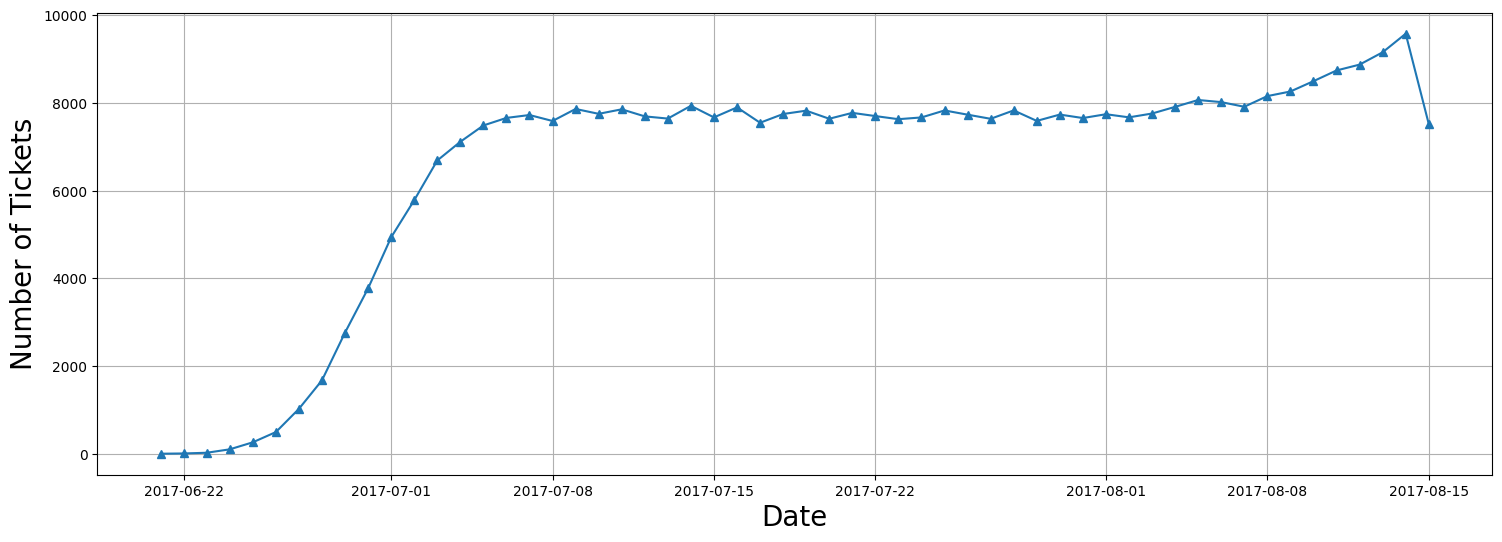

In [60]:
tickets = pd.read_sql_query("""SELECT * FROM tickets t1
                                JOIN bookings t2
                                ON t1.book_ref = t2.book_ref""",connection)
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
x = tickets.groupby('date')[['date']].count()
plt.figure(figsize = (18,6))
plt.plot(x.index,x['date'],marker = '^')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of Tickets',fontsize=20)
plt.grid('b')
plt.show()

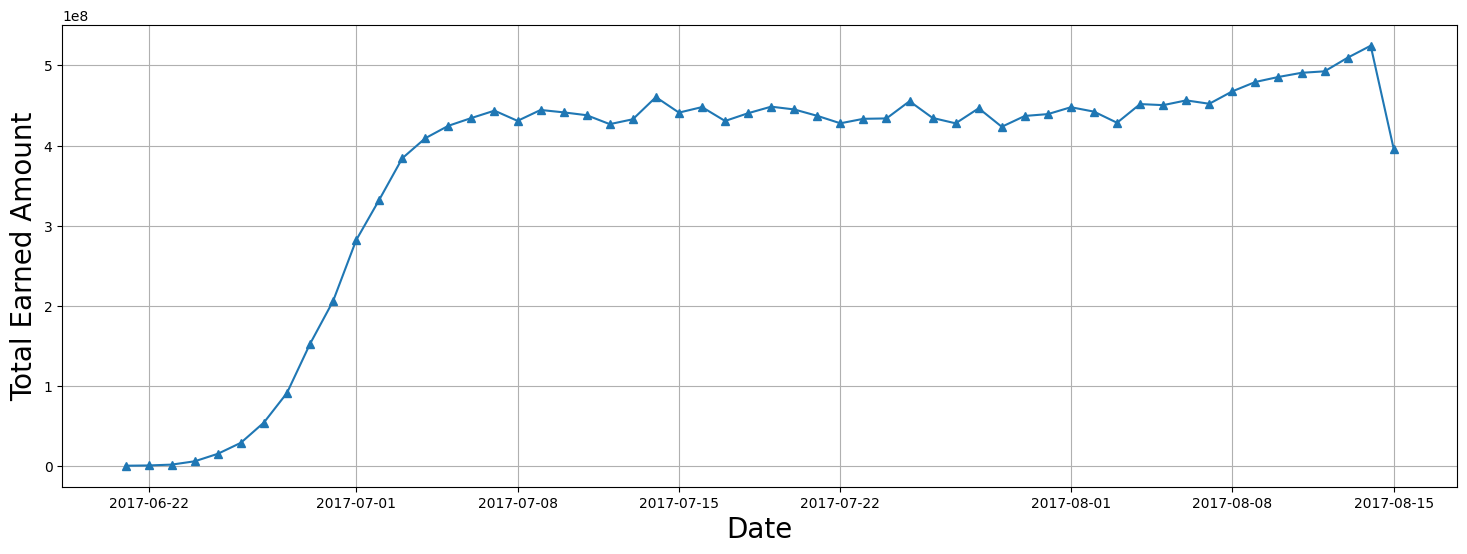

In [64]:
bookings = pd.read_sql_query("""SELECT * FROM bookings""",connection)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
x = bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize = (18,6))
plt.plot(x.index,x['total_amount'],marker = '^')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Total Earned Amount',fontsize=20)
plt.grid('b')
plt.show()

Q3 : Calculate the average charges for each aircraft with different fare condition

In [69]:
df = pd.read_sql_query("""SELECT fare_conditions, aircraft_code, AVG(amount) FROM ticket_flights t1
                          JOIN flights t2
                          ON t1.flight_id = t2.flight_id
                          GROUP BY aircraft_code,fare_conditions""",connection)


<Axes: xlabel='aircraft_code', ylabel='AVG(amount)'>

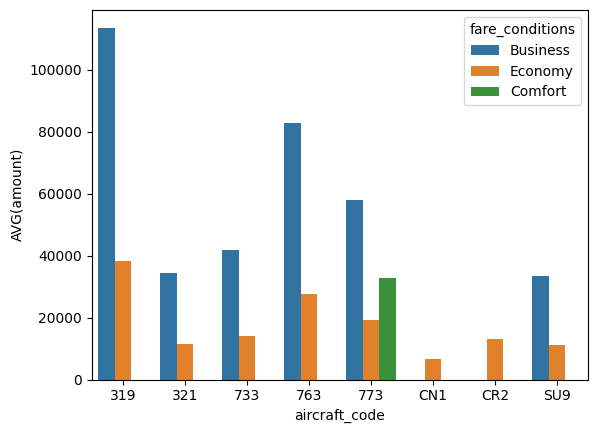

In [70]:
sns.barplot(data=df, x = 'aircraft_code', y = 'AVG(amount)', hue = 'fare_conditions')

# **Analizing Occupancy Rate**

Q4 : For each aircraft, calculate the total revenue per year and the average revenue per tickets

In [76]:
pd.read_sql_query("""SELECT aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count AS avg_revenue_per_ticket FROM
                      (SELECT aircraft_code, COUNT(*) AS ticket_count, SUM(amount) as total_revenue FROM ticket_flights t1
                      JOIN flights t2
                      on t1.flight_id = t2.flight_id
                      GROUP BY aircraft_code)""",connection)

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


Q5 : Calculate the average occupancy per aircraft

In [77]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code, a.flight_id, a.booked_seats, b.total_seats, avg(a.booked_seats)/b.total_seats as occupancy_rate  from
                    (select aircraft_code, flight_id, count(*) as booked_seats from boarding_passes
                    inner join flights using (flight_id)
                    group by aircraft_code, flight_id) as a
                    inner join
                    (select aircraft_code, count(*) as total_seats from seats
                    group by aircraft_code) as b
                    on a.aircraft_code = b.aircraft_code
                    group by a.aircraft_code""", connection)

occupancy_rate

,aircraft_code,flight_id,booked_seats,total_seats,occupancy_rate
0,319,1162,51,116,0.461924
1,321,1,79,170,0.522407
2,733,1482,98,130,0.617350
3,763,429,140,222,0.513231
4,773,245,222,402,0.659019
5,CN1,672,12,12,0.500369
6,CR2,615,25,50,0.429657
7,SU9,370,43,97,0.585692


Q6 : Calculate by how much the total annual turnover could increase by giving all aircrafts a 10% high occupancy rate

In [78]:
occupancy_rate['inc occupancy_rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.10

In [79]:
occupancy_rate

,aircraft_code,flight_id,booked_seats,total_seats,occupancy_rate,inc occupancy_rate
0,319,1162,51,116,0.461924,0.508116
1,321,1,79,170,0.522407,0.574648
2,733,1482,98,130,0.617350,0.679085
3,763,429,140,222,0.513231,0.564554
4,773,245,222,402,0.659019,0.724921
5,CN1,672,12,12,0.500369,0.550406
6,CR2,615,25,50,0.429657,0.472623
7,SU9,370,43,97,0.585692,0.644261


In [80]:
total_revenue = pd.read_sql_query("""select aircraft_code, flight_id, sum(amount) as total_revenue from ticket_flights
                    inner join flights using (flight_id)
                    group by aircraft_code""",connection)
total_revenue

,aircraft_code,flight_id,total_revenue
0,319,1214,2706163100
1,321,9307,1638164100
2,733,6223,1426552100
3,763,17003,4371277100
4,773,30625,3431205500
5,CN1,2575,96373800
6,CR2,2055,1982760500
7,SU9,24836,5114484700


In [81]:
pd.set_option("display.float_format", str)

In [82]:
occupancy_rate['inc 10% occupancy_rate'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc occupancy_rate']
occupancy_rate

,aircraft_code,flight_id,booked_seats,total_seats,occupancy_rate,inc occupancy_rate,inc 10% occupancy_rate
0,319,1162,51,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,1,79,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,1482,98,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,429,140,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,245,222,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,672,12,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,615,25,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,370,43,97,0.5856918832583128,0.644261071584144,5625933169.999999
